In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Preparing the Data

In [2]:
train_df = pd.read_csv('https://github.com/vichShir/kaggle-getting-started-competitions/blob/master/MNIST/data/train.csv?raw=true')
teste_df = pd.read_csv('https://github.com/vichShir/kaggle-getting-started-competitions/blob/master/MNIST/data/valid.csv?raw=true')

valid_df = train_df[33600:]
train_df = train_df[:33600]

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

In [4]:
# Image vectors
x_train = train_df.values
x_valid = valid_df.values
x_teste = teste_df.values

In [5]:
# Reshape image vectors
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_teste = x_teste.reshape(-1, 28, 28, 1)

In [6]:
# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255
x_teste = x_teste / 255

In [7]:
# Turn our scalar targets into binary categories
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [8]:
x_train.shape, x_valid.shape, x_teste.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (28000, 28, 28, 1))

## Visualizing the Dataset

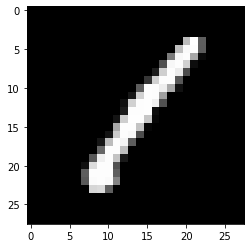

In [9]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [10]:
def decode(x):
    digits = '0123456789'
    predict_label = digits[np.argmax(x)]
    return predict_label

def export_submission():
    predictions = model.predict(x_teste)
    predictions = np.apply_along_axis(decode, 1, predictions)
    
    df = pd.DataFrame({
        'ImageId': range(1, len(predictions) + 1),
        'Label': predictions
    })
    
    assert df.shape == (28000, 2)
    df.to_csv('submission.csv', index=False)

# Model 1 - Fully Connected Network

In [11]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28, 1]))
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

2022-12-23 01:31:44.819834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:31:44.820739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:31:44.972244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:31:44.973244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:31:44.974001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.2327 - accuracy: 0.9286 - val_loss: 0.1303 - val_accuracy: 0.9625
Epoch 2/20
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1056 - accuracy: 0.9704 - val_loss: 0.1271 - val_accuracy: 0.9664
Epoch 3/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0797 - accuracy: 0.9774 - val_loss: 0.1141 - val_accuracy: 0.9776
Epoch 4/20
1050/1050 [==============================] - 8s 7ms/step - loss: 0.0628 - accuracy: 0.9831 - val_loss: 0.1542 - val_accuracy: 0.9729
Epoch 5/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0520 - accuracy: 0.9870 - val_loss: 0.2005 - val_accuracy: 0.9704
Epoch 6/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0439 - accuracy: 0.9891 - val_loss: 0.1618 - val_accuracy: 0.9745
Epoch 7/20
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0404 - accuracy: 0.9896 - val_loss: 0.1752 - val_accuracy:

In [29]:
model.evaluate(x_valid, y_valid)

263/263 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.9806


[0.3115144670009613, 0.9805952310562134]

In [20]:
# Predict on test dataset
image = x_teste[0].reshape(-1, 28, 28, 1)
prediction = model.predict(image)
decode(prediction)

'2'

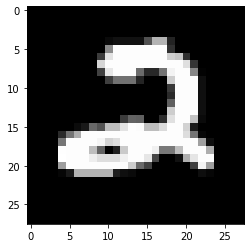

In [42]:
plt.imshow(image.reshape(28, 28, 1), cmap='gray')

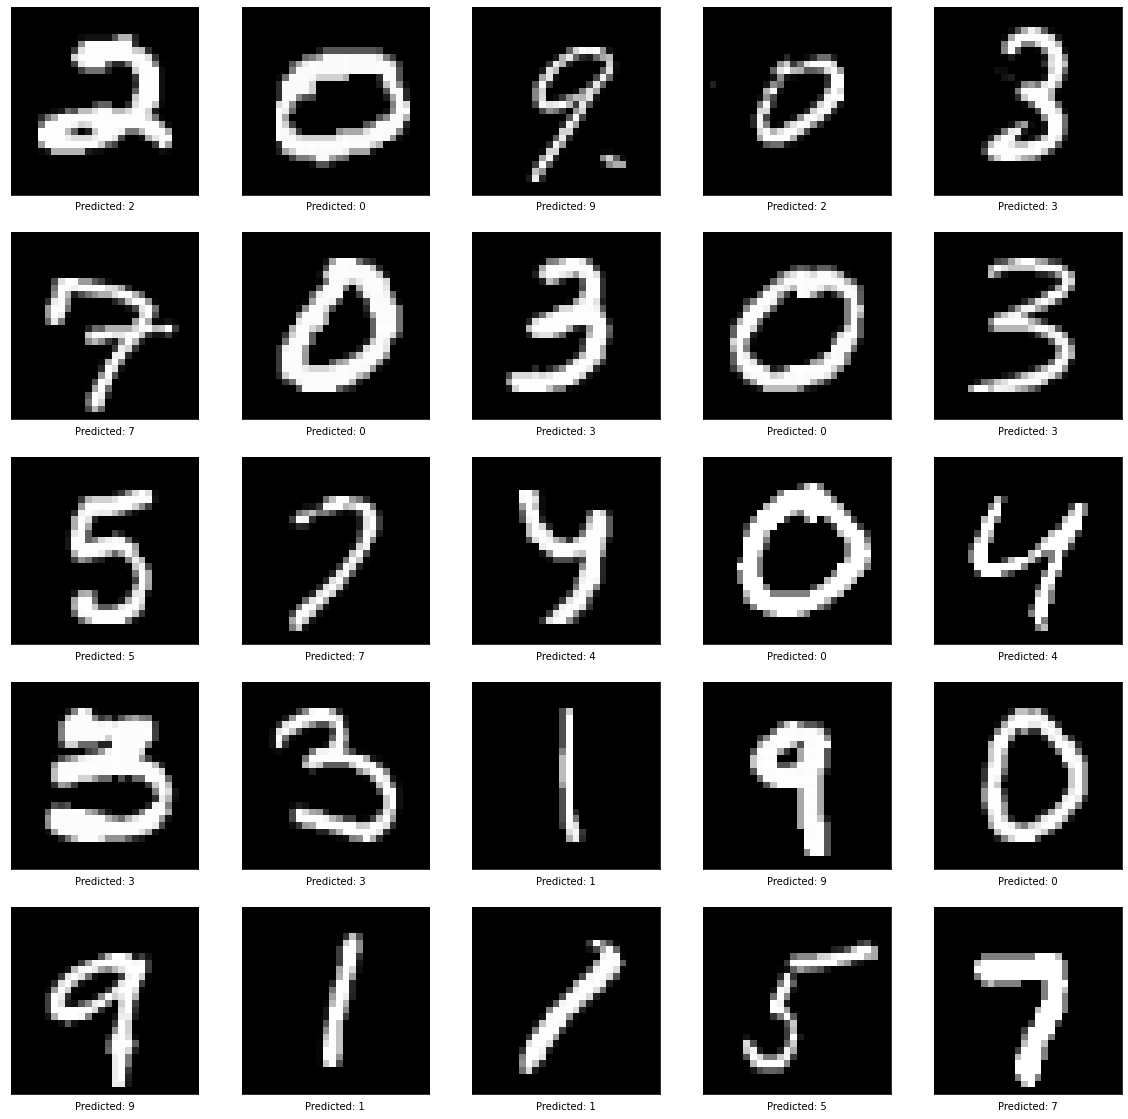

In [43]:
plt.figure(figsize=(20, 20))
predicts = model.predict(x_teste)[:25]
for i, image in enumerate(x_teste.reshape(-1, 28, 28, 1)[:25]):
    ax = plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.gray)

    digits = '0123456789'
    predict_label = digits[np.argmax(predicts[i])]
    plt.xlabel('Predicted: %s' % predict_label)
plt.show()

# Model 2 - Convolutional Neural Network

In [14]:
layers = [
    Conv2D(input_shape=[28, 28, 1],
           filters=75,
           kernel_size=3,
           strides=1,
           padding='same',
           activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Conv2D(filters=50,
           kernel_size=3,
           strides=1,
           padding='same',
           activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Conv2D(filters=25,
           kernel_size=3,
           strides=1,
           padding='same',
           activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=num_classes, activation='softmax')
]

model = Sequential(layers)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

2022-12-23 21:39:06.530256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:39:06.531284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:39:06.863548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:39:06.864510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:39:06.865360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0

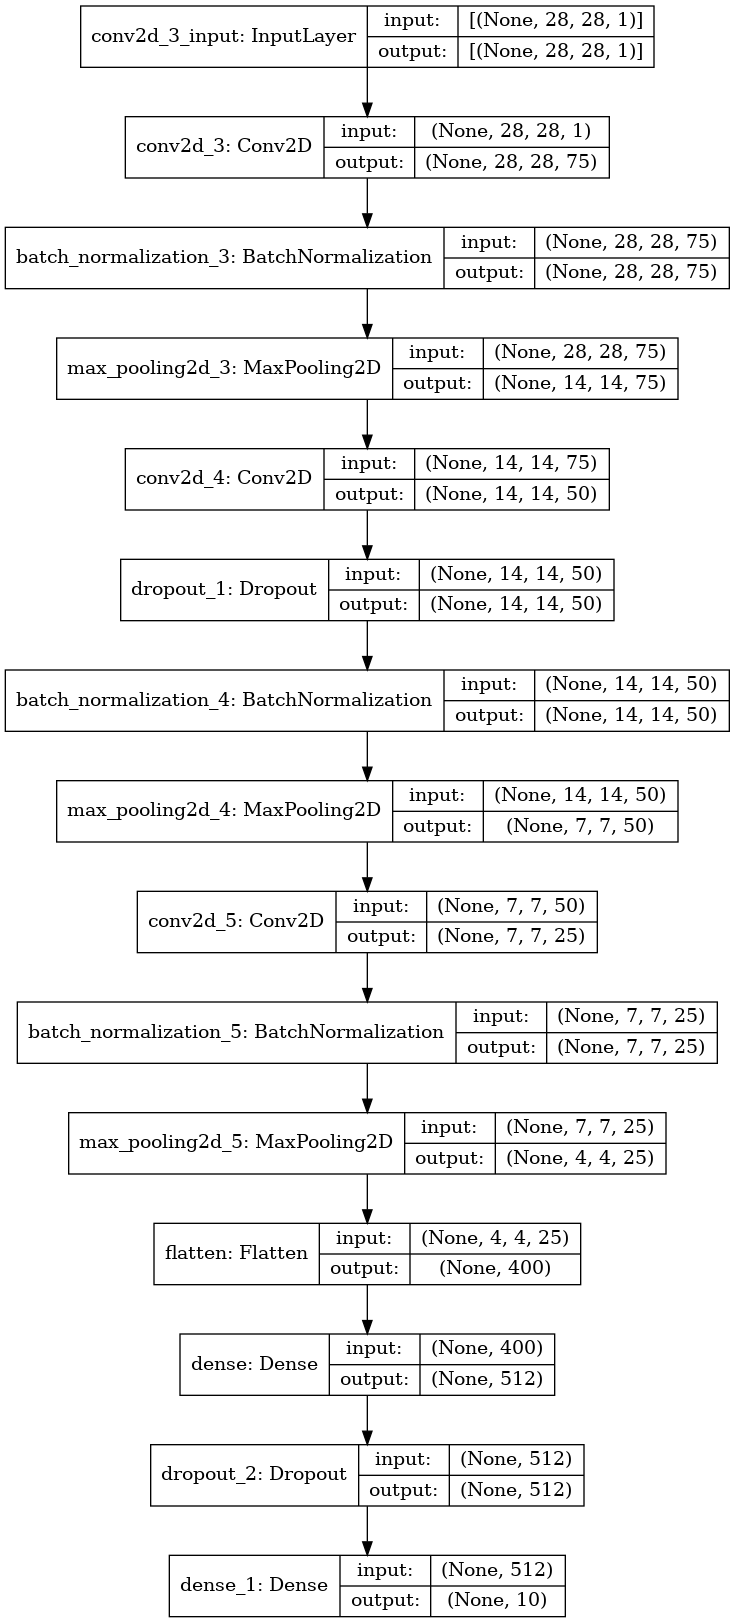

In [16]:
# plot the model including the sizes of the model
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

2022-12-23 01:32:00.455182: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-12-23 01:32:02.784835: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1050/1050 [==============================] - 15s 5ms/step - loss: 0.1706 - accuracy: 0.9491 - val_loss: 0.1044 - val_accuracy: 0.9677
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0680 - accuracy: 0.9817 - val_loss: 0.0733 - val_accuracy: 0.9831
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0592 - accuracy: 0.9855 - val_loss: 0.0467 - val_accuracy: 0.9880
Epoch 4/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0494 - accuracy: 0.9880 - val_loss: 0.1300 - val_accuracy: 0.9725
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0414 - accuracy: 0.9896 - val_loss: 0.0525 - val_accuracy: 0.9886
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0387 - accuracy: 0.9909 - val_loss: 0.0595 - val_accuracy: 0.9882
Epoch 7/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0320 - accuracy: 0.9925 - val_loss: 0.0798 - val_accuracy: 0.9852
Ep

In [18]:
model.evaluate(x_valid, y_valid)

263/263 [==============================] - 1s 4ms/step - loss: 0.0806 - accuracy: 0.9901


[0.08056781440973282, 0.9901190400123596]

In [21]:
export_submission()

# Model 3 - CNN with Data Augmentation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

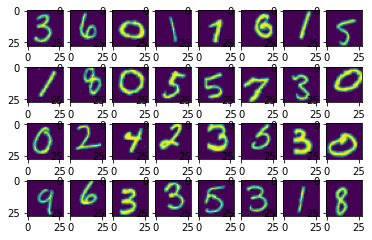

In [18]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [19]:
datagen.fit(x_train)

In [20]:
model.fit(img_iter, epochs=20, steps_per_epoch=len(x_train)/batch_size, validation_data=(x_valid, y_valid))

2022-12-23 21:41:15.076911: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-12-23 21:41:18.232402: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1050/1050 [==============================] - 28s 14ms/step - loss: 0.2481 - accuracy: 0.9232 - val_loss: 0.0895 - val_accuracy: 0.9731
Epoch 2/20
1050/1050 [==============================] - 16s 15ms/step - loss: 0.1121 - accuracy: 0.9696 - val_loss: 0.0546 - val_accuracy: 0.9854
Epoch 3/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0958 - accuracy: 0.9746 - val_loss: 0.0467 - val_accuracy: 0.9869
Epoch 4/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0862 - accuracy: 0.9776 - val_loss: 0.0647 - val_accuracy: 0.9837
Epoch 5/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0796 - accuracy: 0.9794 - val_loss: 0.0934 - val_accuracy: 0.9782
Epoch 6/20
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0772 - accuracy: 0.9802 - val_loss: 0.0883 - val_accuracy: 0.9775
Epoch 7/20
1050/1050 [==============================] - 15s 15ms/step - loss: 0.0709 - accuracy: 0.9825 - val_loss: 0.0558 - val_accura

In [21]:
model.evaluate(x_valid, y_valid)

263/263 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9935


[0.03560316935181618, 0.9934523701667786]

In [22]:
export_submission()

# Model 4 - Fine-Tuning the Model

In [23]:
# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=.00001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(img_iter,
          validation_data=(x_valid, y_valid),
          steps_per_epoch=len(x_train)/batch_size,
          validation_steps=len(x_valid)/batch_size,
          epochs=20)

Epoch 1/20
1050/1050 [==============================] - 16s 14ms/step - loss: 0.0414 - accuracy: 0.9893 - val_loss: 0.0314 - val_accuracy: 0.9946
Epoch 2/20
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 0.0305 - val_accuracy: 0.9944
Epoch 3/20
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0300 - val_accuracy: 0.9943
Epoch 4/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.0295 - val_accuracy: 0.9944
Epoch 5/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0276 - accuracy: 0.9924 - val_loss: 0.0297 - val_accuracy: 0.9945
Epoch 6/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0274 - accuracy: 0.9928 - val_loss: 0.0296 - val_accuracy: 0.9946
Epoch 7/20
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0295 - accuracy: 0.9921 - val_loss: 0.0293 -

In [25]:
model.evaluate(x_valid, y_valid)

263/263 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9951


[0.028023384511470795, 0.995119035243988]

In [26]:
export_submission()